## Practical Work 3

# Name: Abdellrahman Amgad
## group:1

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)
y=(-2*x+1)

In [3]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

#### Plot your data points. 

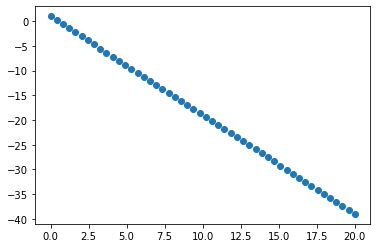

In [4]:
plt.scatter(x,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def GD(x,y,alpha,iterations):
    theta0_1=0
    theta1_1=0
    costs=[]
    all_theta0=[]
    all_theta1=[]
    all_h=[]
    for i in range(iterations):
        cost=0
        hypothesis=theta0_1+theta1_1*x
        all_h.append(hypothesis)
        cost=1/2*(len(x))*((np.linalg.norm(hypothesis-y))**2)
        costs.append(cost)
        gradients=[(1/len(x))*np.sum(hypothesis-y),(1/len(x))*np.sum(x.dot(hypothesis-y))]
        theta0_1=theta0_1-alpha*gradients[0]
        all_theta0.append(theta0_1)
        theta1_1=theta1_1-alpha*gradients[1]
        all_theta1.append(theta1_1)
    return all_theta0,all_theta1,costs,all_h[-1],all_h,theta0_1,theta1_1
all_theta0,all_theta1,cost,hypothesis,all_h,theta0,theta1=GD(x,y,0.001,50)

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y,hypothesis)
print(r2)
print('in percentage',r2*100,'%')

0.9976352360258535
in percentage 99.76352360258535 %


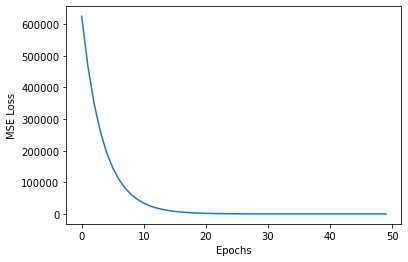

In [7]:
plt.plot(cost)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

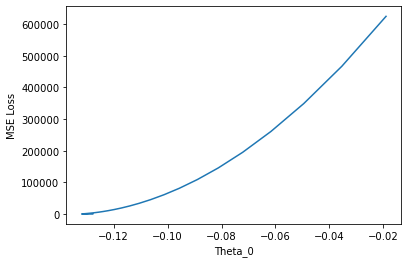

In [8]:
plt.plot(all_theta0,cost)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

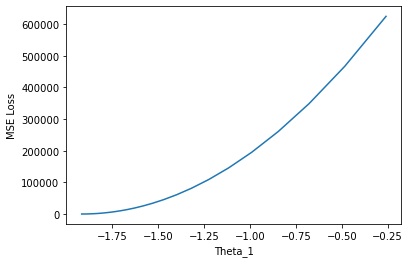

In [9]:
plt.plot(all_theta1,cost)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

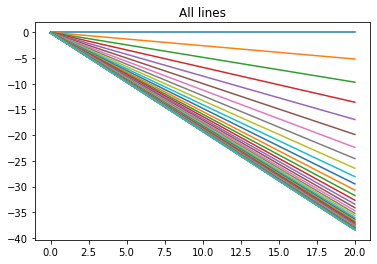

In [10]:
for i in range(len(all_h)):
    plt.plot(x,all_h[i])
plt.title('All lines')
plt.show()

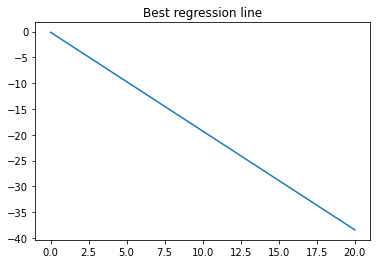

In [11]:
plt.plot(x,all_h[-1])
plt.title('Best regression line')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

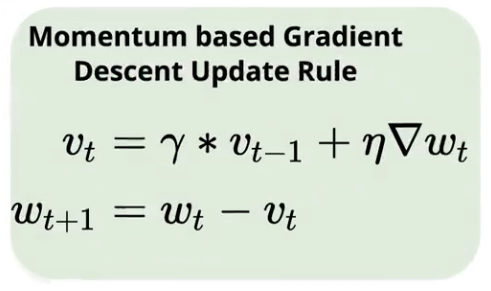

#### γ takes values between 0 and 1.
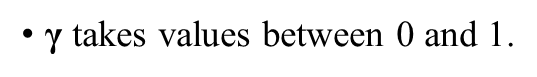

In [12]:
def momentum_GD(x,y,learing_rate,gamma,max_iter):
    theta_0=0
    theta_1=0
    cost=0
    v_old_0,v_new_0,v_old_1,v_new_1=0,0,0,0
    all_theta_0,all_theta_1,costs=[],[],[]
    for i in range(max_iter):
        hypothesis=theta_0+theta_1*x
        cost=(1/(2*len(x)))*((np.linalg.norm(hypothesis-y))**2)
        gradients= [(1/len(x))*np.sum(hypothesis-y),(1/len(x))*np.sum(x.dot(hypothesis-y))]
        v_new_0=gamma*v_old_0+learing_rate*gradients[0]
        v_new_1=gamma*v_old_1+learing_rate*gradients[1]
        theta_0=theta_0-v_new_0
        theta_1=theta_1-v_new_1
        v_old_0=v_new_1
        v_old_1=v_new_1
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)
    return all_theta_0, all_theta_1, costs
thetas_0,thetas_1,costs=momentum_GD(x,y,0.001,0.5,100)

In [13]:
y_pred=x*thetas_1[-1]+thetas_0[-1]
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
print(r2)
print('in percentage',r2*100,'%')

0.9929649704877118
in percentage 99.29649704877119 %


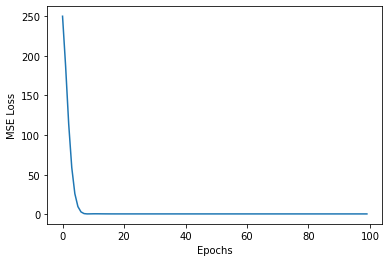

In [14]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

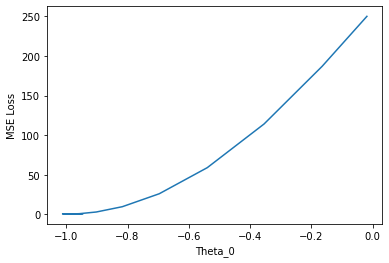

In [15]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

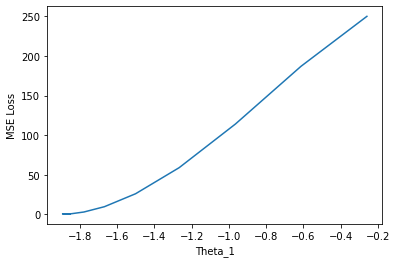

In [16]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [17]:
thetas_0,thetas_1,costs=momentum_GD(x,y,0.001,0.99,200)

In [18]:
y_pred=thetas_0[-1]+thetas_1[-1]*x
y_pred

array([ -0.71733135,  -1.28866635,  -1.86000135,  -2.43133635,
        -3.00267135,  -3.57400635,  -4.14534135,  -4.71667635,
        -5.28801134,  -5.85934634,  -6.43068134,  -7.00201634,
        -7.57335134,  -8.14468634,  -8.71602134,  -9.28735634,
        -9.85869134, -10.43002634, -11.00136134, -11.57269634,
       -12.14403133, -12.71536633, -13.28670133, -13.85803633,
       -14.42937133, -15.00070633, -15.57204133, -16.14337633,
       -16.71471133, -17.28604633, -17.85738133, -18.42871633,
       -19.00005132, -19.57138632, -20.14272132, -20.71405632,
       -21.28539132, -21.85672632, -22.42806132, -22.99939632,
       -23.57073132, -24.14206632, -24.71340132, -25.28473631,
       -25.85607131, -26.42740631, -26.99874131, -27.57007631,
       -28.14141131, -28.71274631])

In [19]:
r2=r2_score(y,y_pred)
print(r2)
print('in percentage',r2*100,'%')

0.7776247819814675
in percentage 77.76247819814674 %


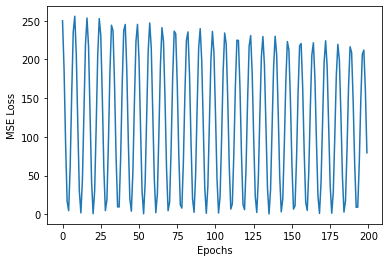

In [20]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

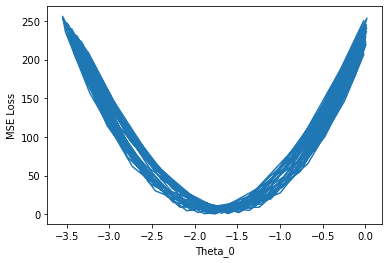

In [21]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

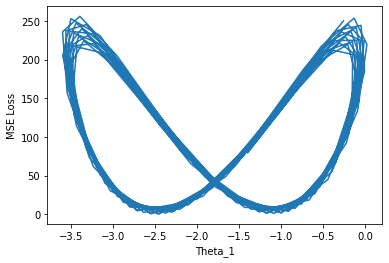

In [22]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

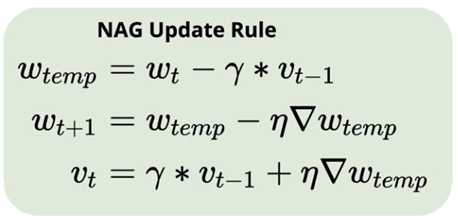

In [23]:
def NAG_GD(x,y,learing_rate,gamma,max_iter):
    theta_0=0
    theta_1=0
    cost=0
    v_old_0,v_new_0,v_old_1,v_new_1=0,0,0,0
    all_theta_0,all_theta_1,costs=[],[],[]
    for i in range(max_iter):
        hypothesis=theta_0+theta_1*x
        cost=(1/(2*len(x)))*((np.linalg.norm(hypothesis-y))** 2)
        theta_0_tmp=theta_0-gamma*v_old_0
        theta_1_tmp=theta_1-gamma*v_old_1
        hypothesis_tmp=theta_0_tmp+theta_1_tmp*x
        gradients_tmp=[(1/len(x))*np.sum(hypothesis_tmp-y),(1/len(x))*np.sum(x.dot(hypothesis_tmp-y))]
        theta_0=theta_0_tmp-learing_rate*gradients_tmp[0]
        theta_1=theta_1_tmp-learing_rate*gradients_tmp[1]
        v_new_0=gamma*v_old_0+learing_rate*gradients_tmp[0]
        v_new_1=gamma*v_old_1+learing_rate*gradients_tmp[1]
        v_old_0=v_new_1
        v_old_1=v_new_1
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs
thetas_0,thetas_1,costs=NAG_GD(x,y,0.001,0.5,100)

In [24]:
y_pre= x*thetas_1[-1]+thetas_0[-1]
from sklearn.metrics import r2_score
r2=r2_score(y,y_pre)
print(r2)
print('in percentage',r2*100,'%')

0.9929657581254271
in percentage 99.29657581254271 %


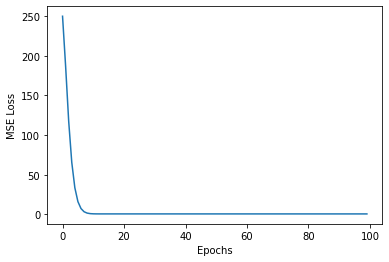

In [25]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

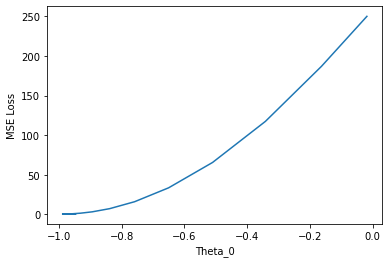

In [26]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

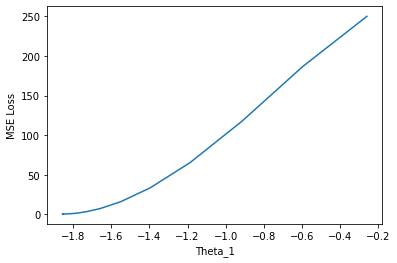

In [27]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

## Congratulations 
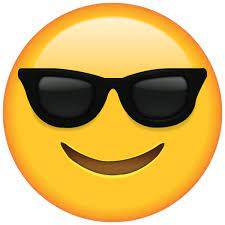